# Medición y error
En el siguiente ejercicio simulamos las lecturas de un sensor ultrasónico HT-SR04 que se utiliza para medir un objeto que se encuentra a 10cm de distancia. 
- Voltaje de trabajo: 5V.
- Corriente de trabajo: 15mA.
- Frecuencia de trabajo: 40KHz
- Rango de funcionamiento: 2 a 500 cm


Comenzaremos importando las librerias de numpy para hacer operaciones en matrices y matplotlib para graficar los datos
Luego utilizaremos el método **simulate_sensor** para simular las mediciones del sensor ultrasónico 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simulate_sensor(bias, std, target_values, n_meas=10):
    """ 
    Simula lecturas del sensor agregando un ruido gausiana al valor real
        Parametros de entrada
            bias: float - Error sistemático generado por defectos en la fabricación del sensor.
            std: float - Error aleatorio generado por ruido en el sistema.
            target_values: Array of floats - Lecturas que deseamos simular
            n_meas: int - Cantidad de lecturas por cada valor especificado en target values
        Salida
            sensor_values: np_array of floats - Todas las lecturas simuladas
            data_per_target: dict with np_arrays - Lecturas de cada target_value
    """
    sensor_values = []
    data_per_target = {}

    buckets = len(target_values)
    for i, real_val in enumerate(target_values, 0):
        measurements = np.random.normal(real_val + bias, std, size=n_meas)
        measurements = np.abs(measurements)
        sensor_values.append(measurements)
        data_per_target[real_val] = measurements

    sensor_values = np.concatenate(sensor_values)
    return sensor_values, data_per_target

Es momento de usar el método **simulate sensors** y visualizar las mediciones generadas.

Tu trabajo es simular las lecturas de un sensor con las siguientes caracteristicas:
- Simula 100 mediciones de un objeto que esta a 10 centimetros de distancia
- Utiliza un bias de 2 y una desviación estandar 5

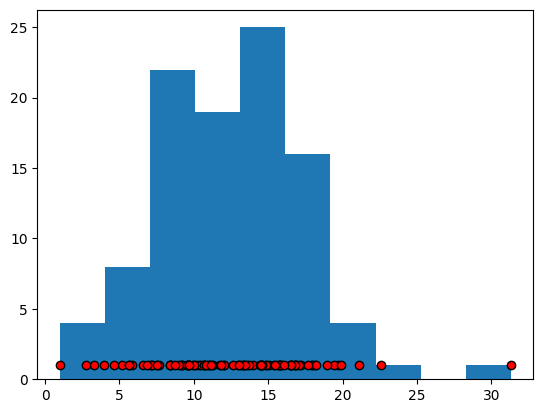

In [3]:
# TODO: Escribe tu código en el siguiente rectangulo
####### Start of solution #######
bias = 2
std = 5
target_values = [10]
n_meas = 100
####### End of solution #########

sensor_data, _ = simulate_sensor(bias, std, target_values, n_meas)
plt.hist(sensor_data, bins=10)
plt.scatter(sensor_data, np.ones_like(sensor_data), c="red", edgecolors='black')
plt.show()

In [4]:
print(f"Distancia máxima: {max(sensor_data)},\t Distancia mínima: {min(sensor_data)}")

Distancia máxima: 31.304966620233234,	 Distancia mínima: 0.9940885512654773


Contesta la siguiente pregunta con los datos obtenidos:

- ¿Cuál es la distancia máxima que leyo el sensor?
- ¿Cuál es la distancia mínima que leyo el sensor?
- ¿Cómo crees que cambiarian los valores medidos si reducimos la desviación estandar?

Tras visualizar la gráfica podemos darnos una idea de que tan bueno es este sensor, pero sería bueno tener métricas para determinar si este es un sensor bueno o malo. 

Para ello calcularemos el error absoluto y el error relativo de este sensor.

El **error absoluto** se puede calcular asi:

- $Error_{abs} = |valor_{medido} - valor_{verdadero}|$

El **error relativo** se calcula asi:

- $Error_{rel} = \frac{|valor_{medido} - valor_{verdadero}|}{valor_{medido}}\times 100$

Tu trabajo será rellenar los siguientes métodos para obtener los resultados deseados

In [5]:
def get_absolute_error(meas, real):
    """ 
    Calcula el error absoluto promedio
        Parametros de entrada
            meas: np.array of floats - Lecturas entregadas por el sensor.
            real: np.array of floats - mediciones reales
        Salida
            abs_error: float - Error absoluto promedio
    """
    #TODO: Termina la función
    ####### Start of solution #######
    abs_error = np.abs(meas - real).mean()
    ####### End of solution #########
    return abs_error

# Hacemos un array de la misma dimension que las mediciones con el valor real
real = np.full_like(sensor_data, 10)
get_absolute_error(sensor_data, real)

4.191482254291484

In [6]:
def get_relative_error(meas, real):
    """ 
    Calcula el error relativo promedio
        Parametros de entrada
            meas: np.array of floats - Lecturas entregadas por el sensor.
            real: np.array of floats - mediciones reales
        Salida
            rel_error: float - Error relativo promedio
    """
    #TODO: Termina la función
    ####### Start of solution #######
    rel_error = ((np.abs(meas - real)/meas) * 100).mean()
    ####### End of solution #########
    return rel_error

# Hacemos un array de la misma dimension que las mediciones con el valor real
get_relative_error(sensor_data, real)

44.21220937753307

A continuación simularemos la lectura de dos sensores distintos y ustedes deberán decidir que sensor es mejor con base a estos datos.
Cada sensor realizo 10 mediciones a 20 objetos que fueron colocados a distintas distancias. Se generó una gráfica con las distancias reales en el eje de las $x$ y las lecturas medidas en el eje de las $y$. Con base en esa información deberás seleccionar que sensor utilizarías.

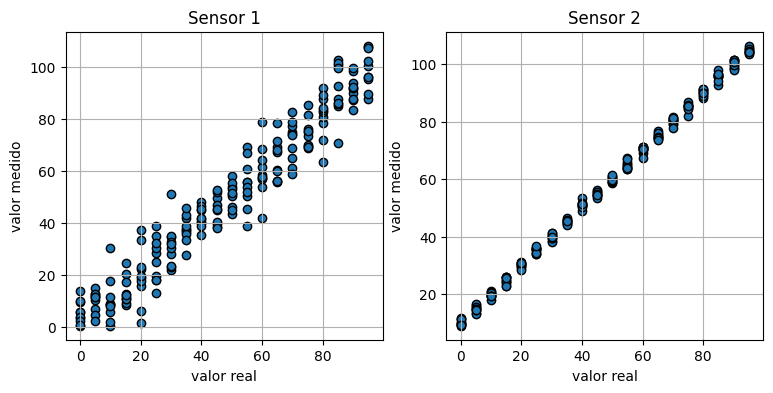

In [7]:
# Simulación de datos
max_range=100
buckets = 20
n_meas = 10
target_values = np.arange(0, max_range, step=max_range//buckets)
targets = np.repeat(target_values, n_meas)
sensor1_data, sensor1_data_dict = simulate_sensor(bias=1, std=8, target_values=target_values, n_meas=n_meas)
sensor2_data, sensor2_data_dict= simulate_sensor(bias=10, std=1, target_values=target_values, n_meas=n_meas)

# Graficas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
# Sensor 1
ax1.set_title("Sensor 1")
ax1.scatter(targets, sensor1_data, edgecolor="black")
ax1.set_xlabel("valor real")
ax1.set_ylabel("valor medido")
ax1.grid()

# Sensor 2
ax2.set_title("Sensor 2")
ax2.scatter(targets, sensor2_data, edgecolor="black")
ax2.set_xlabel("valor real")
ax2.set_ylabel("valor medido")
ax2.grid()
plt.show()

Solo observando las mediciones, contesta las siguientes preguntas

- ¿Cuál sensor parece ser mejor?
- ¿Cuál sensor crees que es más exacto?
- ¿Cuál sensor crees que es más preciso?
- ¿Cómo mejorarías las mediciones generadas por estos sensores?

Calcula el error absoluto y relativo de cada sensor y descubre que sensor es mejor en base a este criterio

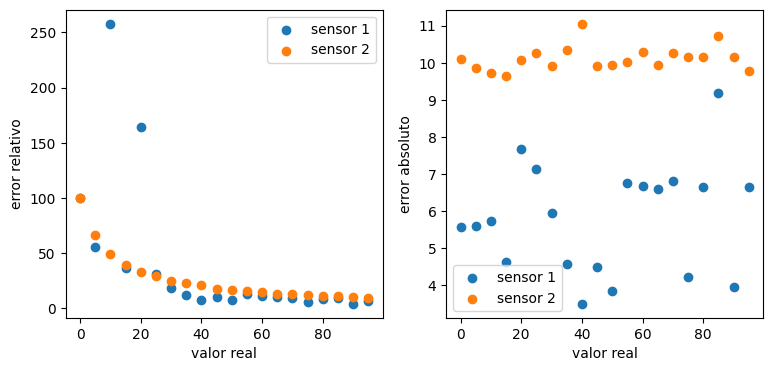

In [8]:
def calc_errors(sensor_data_dict):
    mean_error = {"relative": {}, "absolute": {}}
    for real_val, measurements in sensor_data_dict.items():
        """Recordatorio:
            real_val (int): Valor que real de las mediciones realizadas
            measurements (nparray): 10 mediciones del valor conocido
        """
        #TODO: Calcula: el error absoluto y relativo promedio por cada medicion
        ####### Start of solution ######
        abs_error = get_absolute_error(measurements, real_val)
        rel_error = get_relative_error(measurements, real_val)
        ####### End of solution #########
        mean_error["absolute"][real_val] = abs_error
        mean_error["relative"][real_val] = rel_error
    return mean_error


sensor1_errors = calc_errors(sensor1_data_dict)
sensor2_errors = calc_errors(sensor2_data_dict)
# Graficas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
ax1.scatter(sensor1_errors['relative'].keys(), sensor1_errors['relative'].values(), label="sensor 1")
ax1.scatter(sensor2_errors['relative'].keys(), sensor2_errors['relative'].values(), label="sensor 2")
ax1.set_xlabel("valor real")
ax1.set_ylabel("error relativo")
ax1.legend()
ax2.scatter(sensor1_errors['absolute'].keys(), sensor1_errors['absolute'].values(), label="sensor 1")
ax2.scatter(sensor2_errors['absolute'].keys(), sensor2_errors['absolute'].values(), label="sensor 2")
ax2.set_xlabel("valor real")
ax2.set_ylabel("error absoluto")
ax2.legend()
plt.show()


Observando la gráfica de los errores contesta las siguientes preguntas
- ¿Qué comportamiento  tiene el error relativo conforme aumenta el valor real?
- ¿Cómo explicas este fenómeno?
- ¿Qué sensor tiene un error absoluto promedio más consistente?
- ¿A qué crees que se debe?

In [9]:
# Targets representa los valores ideales que debimos haber medido
targets = np.repeat(target_values, n_meas)

# TODO: Calcula el error absoluto y relativo utilizando todas las mediciones del sensor 1
# Start
total_abs_error = get_absolute_error(sensor1_data, targets)
total_rel_error = get_relative_error(sensor1_data, targets)
# end
print(f"Para el sensor 1, el error absoluto es: {total_abs_error}",
      f"el error relativo es: {total_rel_error}")
      
# TODO: Calcula el error absoluto y relativo utilizando todas las mediciones del sensor 2
# Start
total_abs_error = get_absolute_error(sensor2_data, targets)
total_rel_error = get_relative_error(sensor2_data, targets)
# end
print(f"Para el sensor 2, el error absoluto es: {total_abs_error}",
      f"el error relativo es: {total_rel_error}")


Para el sensor 1, el error absoluto es: 5.810566973850866 el error relativo es: 39.08400037750236
Para el sensor 2, el error absoluto es: 10.112146960120894 el error relativo es: 26.51974615239033


## Calibración e histéresis

En el archivo **data.csv** se muestran los valores obtenidos al realizar la calibración de un instrumento de medida de pesos.

Lo primero que haremos será leer este archivo, una manera de hacerlo es utilizando pandas, esta librería es bastante util para leer datos en formato csv.

In [10]:
import pandas as pd
df = pd.read_csv('data.csv', sep=',', header=0)
# Imprimiendo las primeros 5 lineas
print(df.head(5))

   Carga  Incrementando  Decrementando
0      0           0.08           0.06
1      5           0.45           0.88
2     10           1.02           2.04
3     15           1.71           3.10
4     20           2.55           4.18


Tu trabajo es graficar dos lineas:
- La primera linea será de color <span style="color:blue">azul</span> y tendra la carga en el eje de las $x$ y la medición incrementando en el eje de las $y$.
- La segunda linea será de color <span style="color:red">rojo</span> y tendra la carga en el eje de las $x$ y la medición decrementando en el eje de las $y$.  

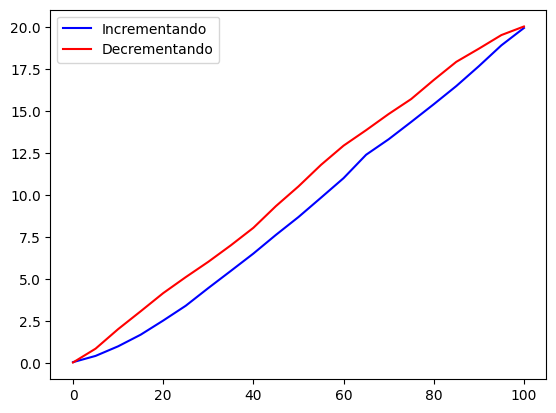

In [11]:
# Puedes acceder a la columna de carga como df["Carga"]
# Hint: puedes usar plt.plot de matplotlib
plt.plot(df['Carga'], df['Incrementando'], c="blue", label="Incrementando")
plt.plot(df['Carga'], df['Decrementando'], c="red", label="Decrementando")
plt.legend()
plt.show()

Esta gráfica demuestra de manera clara el fenómeno conocido como **histéresis**, en donde la medición del sensor depende de la medición anterior. 

Para calcular numéricamente la histéresis puedes usar la siguiente fórmula:

$histeresis = \frac{error_{max}}{rango}$

In [12]:
def histeresis(decrementando, incrementando):
    """ 
    Calcular la histéresis del instrumento de medición
    """
    # TODO: Calcula el error máximo:
    # Resta el valor de decrementando menos el valor de incrementando
    # y luego encuentra el valor máximo de la lista resultante,
    error_max = (decrementando - incrementando).max()   
    # TODO: Calcula el rango:
    # Resta el valor max de decrementando menos el valor min de decrementando
    rango = decrementando.max() - decrementando.min()

    return error_max/rango

histeresis(df["Decrementando"], df["Incrementando"])

0.09769539078156318

#### Modelo de regresión lineal

Ahora vamos a encontrar un modelo lineal utilizando la columna de incrementando.

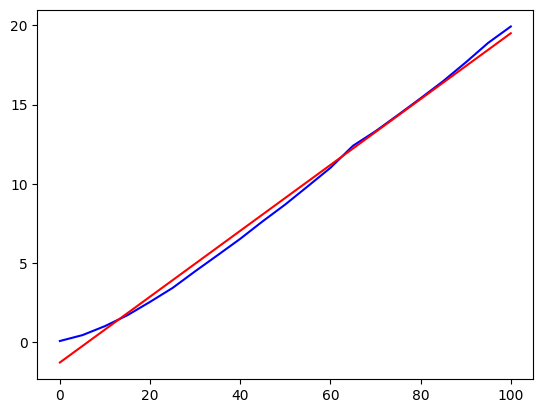

In [13]:
# TODO: Usaremos como x la columna de carga y como y la columna de incrementando
x = df["Carga"]
y = df["Incrementando"]

# Como vimos en clase aumentaremos x con una columna de unos, 
# considerando el termino para el sesgo
A = np.vstack([x, np.ones(len(x))]).T

#TODO: Encuentra la solución utilizando {A} y {y}
#Hint - utiliza np.linalg.lstsq para encontrar la solución por minimos cuadrados
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

#TODO: Grafica la línea de los datos de incrementando junto con las 
# predicciones de tu modelo linealizado
plt.plot(x, y, c="blue", label="incrementando")
plt.plot(x, m * x + c, c="red", label="modelo")
plt.show()



### Conclusión
TODO: Escriban sus conclusiones individuales